# Q2) Consider the Google Stock Prediction dataset.

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [28]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [29]:
df['date'] = pd.to_datetime(df['date'])
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [30]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [31]:
#Standardize the required columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['close', 'high', 'low', 'open', 'volume', 'adjClose','adjHigh', 'adjLow', 'adjOpen', 'adjVolume']] = scaler.fit_transform(df[['close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']])

In [32]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,-1.299770,-1.303405,-1.296941,-1.304701,-0.424763,-1.299770,-1.303405,-1.296941,-1.304701,-0.424763,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,-1.298074,-1.302088,-1.285875,-1.298110,-0.556347,-1.298074,-1.302088,-1.285875,-1.298110,-0.556347,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,-1.320413,-1.318427,-1.322983,-1.308808,0.547447,-1.320413,-1.318427,-1.322983,-1.308808,0.547447,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,-1.369058,-1.338638,-1.362094,-1.325183,2.588274,-1.369058,-1.338638,-1.362094,-1.325183,2.588274,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,-1.363865,-1.355003,-1.348998,-1.351027,0.691275,-1.363865,-1.355003,-1.348998,-1.351027,0.691275,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,3.261574,3.202156,3.266797,3.233261,-0.588060,3.261574,3.202156,3.266797,3.233261,-0.588060,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,3.305313,3.270545,3.338550,3.308020,-0.500671,3.305313,3.270545,3.338550,3.308020,-0.500671,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,3.327626,3.297660,3.388969,3.359289,-0.855568,3.327626,3.297660,3.388969,3.359289,-0.855568,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,3.406440,3.344793,3.406585,3.344928,-0.057287,3.406440,3.344793,3.406585,3.344928,-0.057287,0.0,1.0


In [33]:
df1 = df[(df['date'].dt.year>=2020) & (df['date'].dt.year<=2021)]

In [34]:
input_cols = ['close', 'high', 'low', 'open', 'volume', 'adjClose','adjHigh', 'adjLow', 'adjOpen', 'adjVolume']

In [35]:
X = df1[['close', 'high', 'low', 'open', 'volume', 'adjClose','adjHigh', 'adjLow', 'adjOpen', 'adjVolume']].values
y = df1['close'].values

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
X_train = X_train.reshape(-1, 1, len(input_cols))
X_test = X_test.reshape(-1,1,len(input_cols))

In [38]:
X_train.shape

(254, 1, 10)

## A. Build a Simple RNN model with 5 layers (use dropouts if required) to predict the stock price for the years 2020 and 2021.

In [39]:
from tensorflow.keras.layers import SimpleRNN,Dropout,Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
model = Sequential([
    SimpleRNN(64,activation='relu',input_shape=(1,len(input_cols)),return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32,activation='relu',return_sequences=True),
    Dropout(0.2),
    SimpleRNN(8,activation='relu'),
    Dense(1)
])

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 1, 64)             4800      
                                                                 
 dropout_3 (Dropout)         (None, 1, 64)             0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 1, 32)             3104      
                                                                 
 dropout_4 (Dropout)         (None, 1, 32)             0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 8)                 328       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8241 (32.19 KB)
Trainable params: 8241 (

In [41]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
7/7 [==============================] - 2s 45ms/step - loss: 0.6656 - mae: 0.6264 - val_loss: 0.2304 - val_mae: 0.3890
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.2750 - mae: 0.3587 - val_loss: 0.0764 - val_mae: 0.2240
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.2511 - mae: 0.3598 - val_loss: 0.0349 - val_mae: 0.1533
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1929 - mae: 0.2945 - val_loss: 0.0339 - val_mae: 0.1317
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1797 - mae: 0.2898 - val_loss: 0.0502 - val_mae: 0.1725
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1313 - mae: 0.2682 - val_loss: 0.0388 - val_mae: 0.1501
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1406 - mae: 0.2636 - val_loss: 0.0211 - val_mae: 0.1039
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1360 - mae: 0.2618 - val_loss: 

## B. Compare the accuracy using MAPE and MSE.

In [42]:
y_pred  = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")


4/4 [==============================] - 0s 1ms/step
MAPE: 7.19%
MSE: 0.0414


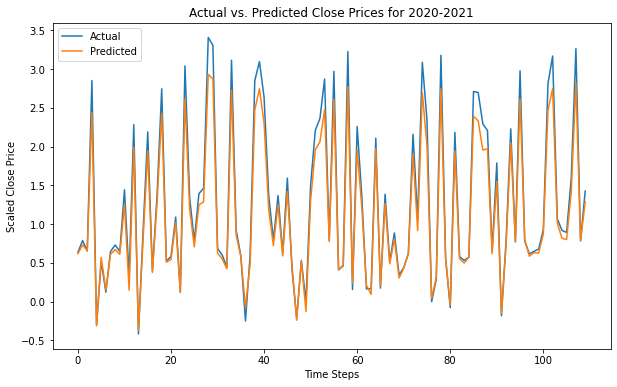

In [43]:
import matplotlib.pyplot as plt

# Inverse scaling to get actual values
y_test_actual = y_test
y_test_predicted = y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_predicted, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.title('Actual vs. Predicted Close Prices for 2020-2021')
plt.legend()
plt.show()

### Now assuming 2 of the dropouts are not there

In [44]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, len(input_cols)), return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(16, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(8, activation='relu'),
    Dense(1)  # Output layer
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling to get actual values
y_test_actual = y_test
y_test_predicted = y_pred


Epoch 1/50
7/7 [==============================] - 2s 50ms/step - loss: 1.4587 - mae: 0.9895 - val_loss: 1.3024 - val_mae: 0.9377
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.7262 - mae: 0.6914 - val_loss: 0.5134 - val_mae: 0.5827
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.3131 - mae: 0.3755 - val_loss: 0.0712 - val_mae: 0.2097
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1352 - mae: 0.2765 - val_loss: 0.0516 - val_mae: 0.2050
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.1908 - mae: 0.3351 - val_loss: 0.0411 - val_mae: 0.1858
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.1476 - mae: 0.2889 - val_loss: 0.0264 - val_mae: 0.1297
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.2182 - val_loss: 0.0553 - val_mae: 0.1819
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0938 - mae: 0.2179 - val_loss: 

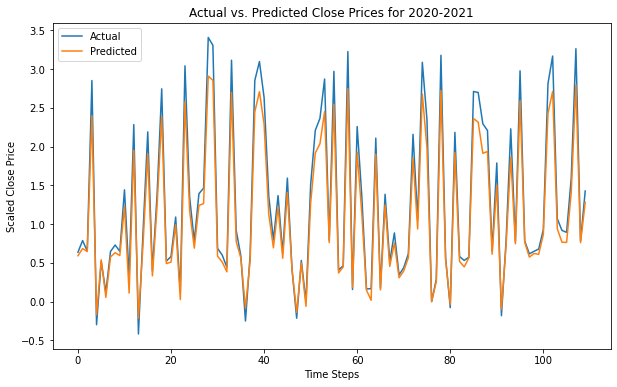

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_predicted, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.title('Actual vs. Predicted Close Prices for 2020-2021')
plt.legend()
plt.show()

In [46]:
# Calculate MAPE and MSE
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

MAPE: 0.82%
MSE: 0.0521


In [47]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, len(input_cols)), return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(16, activation='relu', return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(8, activation='relu'),
    Dense(1)  # Output layer
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scaling to get actual values
y_test_actual = y_test
y_test_predicted = y_pred



Epoch 1/50
7/7 [==============================] - 2s 49ms/step - loss: 2.1533 - mae: 1.1807 - val_loss: 1.2670 - val_mae: 0.9275
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5931 - mae: 0.6167 - val_loss: 0.2813 - val_mae: 0.4335
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0937 - mae: 0.2216 - val_loss: 0.0398 - val_mae: 0.1258
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0363 - mae: 0.1660 - val_loss: 0.0824 - val_mae: 0.2587
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.2217 - val_loss: 0.0422 - val_mae: 0.1730
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0180 - mae: 0.1100 - val_loss: 0.0222 - val_mae: 0.1098
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0132 - mae: 0.0888 - val_loss: 0.0275 - val_mae: 0.1307
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0135 - mae: 0.0881 - val_loss: 

## Plot the Actual vs Predicted values using the test data for the year 2020 and 2021

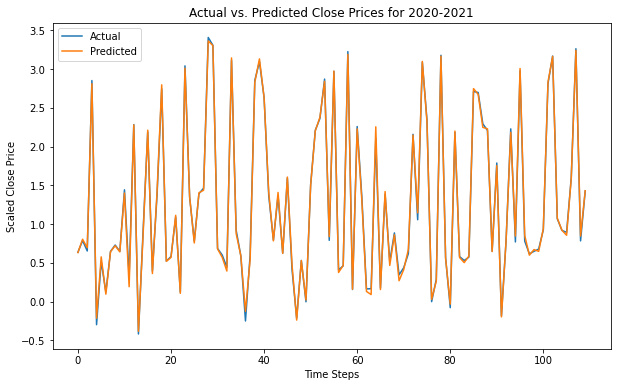

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_predicted, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.title('Actual vs. Predicted Close Prices for 2020-2021')
plt.legend()
plt.show()

In [49]:
# Calculate MAPE and MSE
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

MAPE: 4.76%
MSE: 0.0016


## C. Comment on how many epochs (dropouts) is required for adequate learning.

#### Around 50 epochs are necessary for training and varying the dropouts gives us differing MAE values